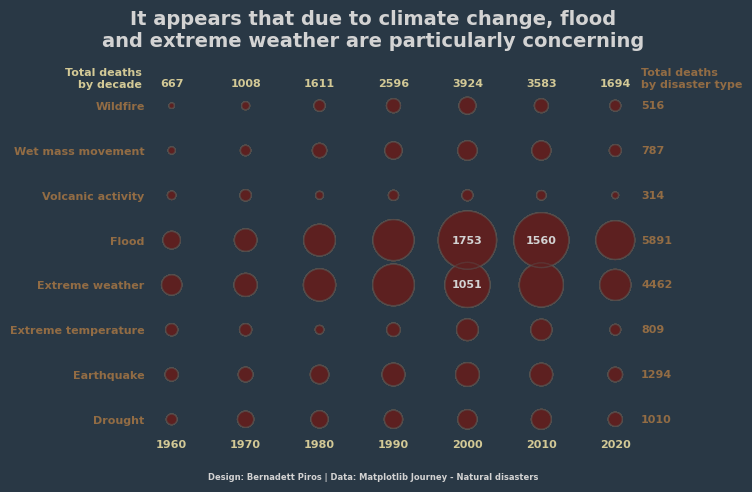

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

url = "https://raw.githubusercontent.com/JosephBARBIERDARNAL/data-matplotlib-journey/refs/heads/main/natural-disasters/natural-disasters.csv"
df = pd.read_csv(url)

df['decade'] = 0  
for i, value in df['Year'].items():
    if value >= 2020:
        df.at[i, 'decade'] = 2020
    elif 2020 > value >= 2010:
        df.at[i, 'decade'] = 2010
    elif 2010 > value >= 2000:
        df.at[i, 'decade'] = 2000
    elif 2010 > value >= 1990:
        df.at[i, 'decade'] = 1990
    elif 1990 > value >= 1980:
        df.at[i, 'decade'] = 1980
    elif 1980 > value >= 1970:
        df.at[i, 'decade'] = 1970
    else:
        df.at[i, 'decade'] = 1960

df_unpivot = pd.melt(df, id_vars='decade',
                     value_vars=['Drought','Earthquake',
                                 'Extreme temperature','Extreme weather',
                                 'Flood','Volcanic activity',
                                 'Wet mass movement','Wildfire'],
                      var_name='type', value_name='count')

grouped_df = df_unpivot.groupby(["decade", "type"])["count"].sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 5))

plt.subplots_adjust(top=0.8, left=0.22, right=0.83)

for i, dec in enumerate(grouped_df['decade']):
    year_data = grouped_df[grouped_df["decade"] == dec]
    x = grouped_df["decade"]
    y = grouped_df["type"]
    s=grouped_df["count"] 
    ax.scatter(x, y, s=s, c="#602020", edgecolor="#575755", alpha=0.3)

subset = grouped_df.sort_values("count", ascending=False)[:3]
for i, row in subset.iterrows():
    count = round(row["count"])
    x_value = row["decade"]
    y_value = row["type"]
    ax.text(
        x=x_value,
        y=y_value,
        s=count,
        ha="center",
        va="center",
        color="lightgrey",
        size=8,
        weight="bold"
    )

agg_type = df_unpivot.groupby('type')['count'].sum().reset_index()
for i, row in agg_type.iterrows():
    count = round(row["count"])
    x_value = 2023.5
    y_value = row["type"]
    ax.text(
        x=x_value,
        y=y_value,
        s=count,
        ha="left",
        va="center",
        color="#926c44",
        size=8,
        weight="bold"
    )

agg_year = df_unpivot.groupby('decade')['count'].sum().reset_index()
for i, row in agg_year.iterrows():
    count = round(row["count"])
    x_value = row["decade"]
    y_value = 7.5
    ax.text(
        x=x_value,
        y=y_value,
        s=count,
        ha="center",
        va="center",
        color="#d3c996",
        size=8,
        weight="bold"
    )

text1 = "Total deaths\nby decade"
ax.text(
    x=1956,
    y=7.6,
    s=text1,
    ha="right",
    va="center",
    color="#d3c996",
    size=8,
    weight="bold"
)

text2 = "Total deaths\nby disaster type"
ax.text(
    x=2023.5,
    y=7.6,
    s=text2,
    ha="left",
    va="center",
    color="#926c44",
    size=8,
    weight="bold"
)

ax.spines[["top", "bottom", "left", "right"]].set_visible(False)
ax.tick_params(length=0)

ax.tick_params(
  axis="x",
  labelsize=8,
  labelcolor="#d3c996",  
)

ax.tick_params(
  axis="y",
  labelsize=8,
  labelcolor="#926c44",
)

title = "It appears that due to climate change, flood\nand extreme weather are particularly concerning"
fig.text(
    x=0.5,
    y=0.92,
    s=title,
    ha="center",
    va="center",
    size=14,
    weight="bold",
    color="lightgrey"
)

ax.set_facecolor("#293845")
fig.set_facecolor("#293845")

ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_fontweight('bold')
for tick in ax.get_yticklabels():
    tick.set_fontweight('bold')

fig.text(0.5, 0.02, "Design: Bernadett Piros | Data: Matplotlib Journey - Natural disasters",
         size=6, weight="bold", ha="center", color="lightgrey" )

plt.show()

#plt.savefig("bubble_natural_disasters", dpi=300, bbox_inches='tight', pad_inches=0.2)